# Salary Prediction using Linear Regression

                                                                                                                                                 By Group 5

In [166]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv("Salary.csv")

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [7]:
data.shape #find the col & rows..

(35, 2)

In [10]:
data.isnull().sum() #checking for null values

YearsExperience    0
Salary             0
dtype: int64

#### Check The corr()

In [106]:
data.corr() #Use corr() function to find the correlation among the columns in the Dataframe

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


<AxesSubplot:>

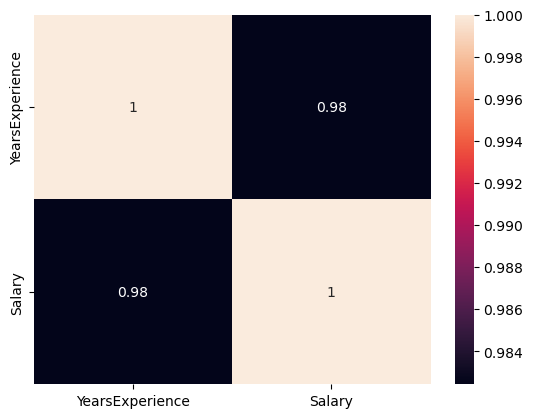

In [ ]:
# visilization of corr -corelation
sns.heatmap(data.corr(),annot=True)

Text(0, 0.5, 'Salary')

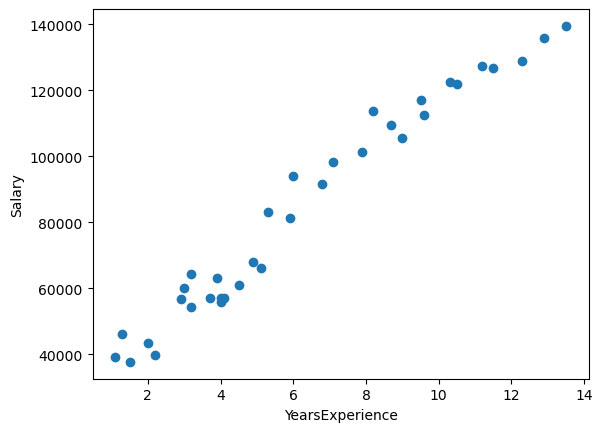

In [74]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

### Splitting the data into train and test

In [144]:
from sklearn.model_selection import train_test_split
# Splitting the data into features (X) and target variable (y)
X = data[['YearsExperience']]
y = data['Salary']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [145]:
# Print the shapes of the training and testing sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (28, 1) (28,)
Testing data shape: (7, 1) (7,)


In [146]:
X_train.head(2)

,YearsExperience
23,8.2
9,3.7


In [147]:
X_test.head(2)

,YearsExperience
6,3.0
20,6.8


In [148]:
y_train.head(2)

23    113812
9      57189
Name: Salary, dtype: int64

In [149]:
y_test.head(2)

6     60150
20    91738
Name: Salary, dtype: int64

## Traning the model

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
# Create and train the linear regression model
model = LinearRegression()

In [152]:
model.fit(X_train, y_train) #fit function train the model.

LinearRegression()

In [153]:
# Get the coefficients and intercept of the model [y = mx+c]
print("Coefficients:(m)",model.coef_)
print("Intercept:(c)",model.intercept_)

Coefficients:(m) [8820.46144302]
Intercept:(c) 28646.603925283787


In [154]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### accuracy of prediction

In [162]:
print("Training accuracy = ",model.score(X_train,y_train)) 
print("Testing accuracy  = ",model.score(X_test,y_test))

Training accuracy =  0.9612981962553101
Testing accuracy  =  0.974544324718912


In [156]:
# from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)

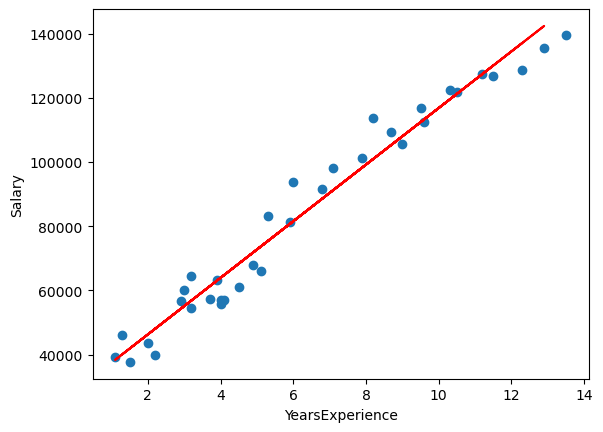

In [165]:
plt.scatter(data["YearsExperience"],data["Salary"])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.plot(X_train,model.predict(X_train),c="r")